In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:

df_ae = pd.read_csv('../data/atitudesEducadores_df.csv', index_col=0)
df_pp = pd.read_csv('../data/praticasprofissionais_df.csv', index_col=0)


ae_questions = pd.read_csv('../data/percepcaosocial_questions.csv')
pp_questions = pd.read_csv('../data/praticasprofissionais_questions.csv')

In [20]:
df_pp

,estado,iniciado,completo,tempo,termo,idade,sexo,escolaridade,estadocivil,estadocivil.outros,...,pp028,pp029,pp030,pp031,pp032,pp033,pp034,pp035,pp036,pp037
1,Finalizadas,4 junho 2014 13:30,4 junho 2014 13:49,18 minutos 47 segundos,Sim,55,Masculino,Pós-graduação,Casado (a),Casado,...,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0
2,Finalizadas,4 junho 2014 13:34,4 junho 2014 13:52,18 minutos 47 segundos,Sim,36,Feminino,Pós-graduação,Casado (a),NaN,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
3,Finalizadas,4 junho 2014 13:34,4 junho 2014 14:15,40 minutos 10 segundos,Sim,49,Feminino,Pós-graduação,Casado (a),NaN,...,1.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,5.0
4,Finalizadas,4 junho 2014 13:35,4 junho 2014 14:10,35 minutos 3 segundos,Sim,38,Feminino,Pós-graduação,Casado (a),Casada,...,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0
5,Finalizadas,4 junho 2014 13:42,5 junho 2014 21:57,1 dia 8 horas,Sim,30,Feminino,Pós-graduação,Casado (a),NaN,...,1.0,4.0,NaN,5.0,3.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,Finalizadas,16 junho 2014 23:36,16 junho 2014 23:51,15 minutos 35 segundos,Sim,52,Feminino,Pós-graduação,Casado (a),NaN,...,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0
3633,Finalizadas,16 junho 2014 23:37,16 junho 2014 23:52,14 minutos 28 segundos,Sim,42,Feminino,Pós-graduação,Casado (a),nenhuma,...,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0
3634,Finalizadas,16 junho 2014 23:44,16 junho 2014 23:59,14 minutos 59 segundos,NaN,43,Feminino,Pós-graduação,Casado (a),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,Em progresso,16 junho 2014 23:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_pp.columns

Index(['estado', 'iniciado', 'completo', 'tempo', 'termo', 'idade', 'sexo',
       'escolaridade', 'estadocivil', 'estadocivil.outros', 'formacao',
       'ocupacao', 'ocupacao.outra', 'nomeservico', 'tempodeservico',
       'religiao', 'religiao.outra', 'contatoanterior', 'lidadiretamente',
       'lida.onde', 'lida.outros', 'motivocurso', 'motivo.outros',
       'materialdidatico', 'prazoatividades', 'interacaopares',
       'organizacaocurso', 'import.ajud.tutor', 'autoavaliacao',
       'part.outrocurso', 'pp001', 'pp002', 'pp003', 'pp004', 'pp005', 'pp006',
       'pp007', 'pp008', 'pp009', 'pp010', 'pp011', 'pp012', 'pp013', 'pp014',
       'pp015', 'pp016', 'pp017', 'pp018', 'pp019', 'pp020', 'pp021', 'pp022',
       'pp023', 'pp024', 'pp025', 'pp026', 'pp027', 'pp028', 'pp029', 'pp030',
       'pp031', 'pp032', 'pp033', 'pp034', 'pp035', 'pp036', 'pp037'],
      dtype='object')

In [23]:
df_pp.prazoatividades.unique()

array(['Muito flexível', 'Flexível', 'Pouco flexível', nan,
       'Pouquíssimo flexível'], dtype=object)

## Base - Práticas Profissionais
---

- Escala de praticas profissionais da pesquisa do curso online de "Prevenção do Uso de Drogas"
- Base possui 3407 registros utilizáveis, depois de ser tratada

In [38]:
df_pp.shape

(3636, 67)

In [43]:
df_pp.estado.unique()

array(['Finalizadas', 'Em progresso', 'Nunca enviadas'], dtype=object)

In [42]:
df_pp.query("estado == 'Em progresso'")

,estado,iniciado,completo,tempo,termo,idade,sexo,escolaridade,estadocivil,estadocivil.outros,...,pp028,pp029,pp030,pp031,pp032,pp033,pp034,pp035,pp036,pp037
13,Em progresso,4 junho 2014 14:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Em progresso,4 junho 2014 14:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Em progresso,4 junho 2014 15:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Em progresso,4 junho 2014 17:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Em progresso,4 junho 2014 19:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,Em progresso,16 junho 2014 23:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3628,Em progresso,16 junho 2014 23:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3631,Em progresso,16 junho 2014 23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,Em progresso,16 junho 2014 23:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_pp.query("estado == 'Nunca enviadas'")

,estado,iniciado,completo,tempo,termo,idade,sexo,escolaridade,estadocivil,estadocivil.outros,...,pp028,pp029,pp030,pp031,pp032,pp033,pp034,pp035,pp036,pp037
299,Nunca enviadas,4 junho 2014 20:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,Nunca enviadas,5 junho 2014 16:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3574,Nunca enviadas,16 junho 2014 21:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3601,Nunca enviadas,16 junho 2014 22:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3620,Nunca enviadas,16 junho 2014 23:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Remove se tiver linhas totalmente nulas
df_pp = df_pp.dropna(how="all")

# Remove linhas/registros que estão "Em progresso", pois estas normalmente só tem a data, sem informações precisas
# são de pessoas que iniciaram o preenchimento, mas não finalizaram, ou não enviaram o questionário
# Ficando apenas os registros de formulários preenchidos onde consta como "Finalizadas"
df_pp = df_pp.query("estado != 'Em progresso' & estado != 'Nunca enviadas'")

df_pp.shape


(3407, 67)

In [51]:
df_pp

,estado,iniciado,completo,tempo,termo,idade,sexo,escolaridade,estadocivil,estadocivil.outros,...,pp028,pp029,pp030,pp031,pp032,pp033,pp034,pp035,pp036,pp037
1,Finalizadas,4 junho 2014 13:30,4 junho 2014 13:49,18 minutos 47 segundos,Sim,55,Masculino,Pós-graduação,Casado (a),Casado,...,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0
2,Finalizadas,4 junho 2014 13:34,4 junho 2014 13:52,18 minutos 47 segundos,Sim,36,Feminino,Pós-graduação,Casado (a),NaN,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
3,Finalizadas,4 junho 2014 13:34,4 junho 2014 14:15,40 minutos 10 segundos,Sim,49,Feminino,Pós-graduação,Casado (a),NaN,...,1.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,5.0
4,Finalizadas,4 junho 2014 13:35,4 junho 2014 14:10,35 minutos 3 segundos,Sim,38,Feminino,Pós-graduação,Casado (a),Casada,...,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0
5,Finalizadas,4 junho 2014 13:42,5 junho 2014 21:57,1 dia 8 horas,Sim,30,Feminino,Pós-graduação,Casado (a),NaN,...,1.0,4.0,NaN,5.0,3.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,Finalizadas,16 junho 2014 23:19,16 junho 2014 23:31,12 minutos,Sim,46 anos,Feminino,Pós-graduação,Casado (a),NaN,...,1.0,4.0,5.0,4.0,2.0,2.0,1.0,4.0,4.0,5.0
3630,Finalizadas,16 junho 2014 23:26,16 junho 2014 23:40,14 minutos 12 segundos,Sim,43,Masculino,Pós-graduação,Divorciado (a),NaN,...,1.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,5.0
3632,Finalizadas,16 junho 2014 23:36,16 junho 2014 23:51,15 minutos 35 segundos,Sim,52,Feminino,Pós-graduação,Casado (a),NaN,...,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0
3633,Finalizadas,16 junho 2014 23:37,16 junho 2014 23:52,14 minutos 28 segundos,Sim,42,Feminino,Pós-graduação,Casado (a),nenhuma,...,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0


In [50]:
df_pp.estadocivil.unique()

array(['Casado (a)', 'Solteiro (a)', 'União Estável', 'Divorciado (a)',
       'Outros', 'Viúvo (a)', nan], dtype=object)

In [ ]:
df_pp.estadocivil.unique()

In [67]:
columns

columns=['estado', 'termo', 'idade', 'sexo',
       'escolaridade', 'estadocivil', 'estadocivil.outros', 'formacao',
       'ocupacao', 'ocupacao.outra', 'nomeservico', 'tempodeservico',
       'religiao', 'religiao.outra', 'contatoanterior', 'lidadiretamente',
       'lida.onde', 'lida.outros', 'motivocurso', 'motivo.outros',
       'materialdidatico', 'prazoatividades', 'interacaopares',
       'organizacaocurso', 'import.ajud.tutor', 'autoavaliacao',
       'part.outrocurso']

unique_values={}

for i in columns:
    unique_values[i]=df_pp[i].unique()
unique=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in unique_values.items() ]))

unique.fillna('').T

,0,1,2,3,4,5,6,7,8,9,...,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108
estado,Finalizadas,,,,,,,,,,...,,,,,,,,,,
termo,Sim,Não,,,,,,,,,...,,,,,,,,,,
idade,55,36,49,38,30,40,37,33,26,42 anos,...,,,,,,,,,,
sexo,Masculino,Feminino,,,,,,,,,...,,,,,,,,,,
escolaridade,Pós-graduação,Ensino Superior Completo,Ensino Médio Completo,Ensino Superior Incompleto,,Ensino Fundamental Completo,Ensino Médio Incompleto,Ensino Fundamental Incompleto,,,...,,,,,,,,,,
estadocivil,Casado (a),Solteiro (a),União Estável,Divorciado (a),Outros,Viúvo (a),,,,,...,,,,,,,,,,
estadocivil.outros,Casado,,Casada,solteiro,casada,respondida questão 8,casado,divorciado,Separada,não possui,...,,,,,,,,,,
formacao,Graduação em Educação Física,LETRAS- PORTUGUÊS / INGLÊS,Letras- Português/ Literatura,Supervisora de Educação e professora,Licenciatura em história,Estudos Sociais - História e Sociologia,Licenciatura em geografia Pós graduação e m ...,Licenciatura em Ciências Biológicas,serviço social,Educação Física,...,,,,,,,,,,
ocupacao,Professor (a),Outros,Diretor (a),Estudante,Supervisor (a),Coordenador (a) Pedagógico,Orientador (a),,,,...,,,,,,,,,,
ocupacao.outra,não,AGENTE EDUCACIONAL II,,Supervisora e Professora,professor,Auxiliar de Secretaria Escolar,Agente Educacional,Gerente/ Assistente Social,ADH,Tutora de curso de pedagogia a distância,...,,,,,,,,,,


In [69]:
df_pp.tempo.unique()

array(['18 minutos 47 segundos', '40 minutos 10 segundos',
       '35 minutos 3 segundos', ..., '48 minutos 10 segundos',
       '28 minutos 55 segundos', '17 minutos 25 segundos'], dtype=object)

# Análises e conhecimento da base:
---

In [75]:
df_pp.tempo.str.replace(' minutos ', ':').str.replace(' segundos', '').str.replace(' dia', ':').str.replace(' horas', ':')

1            18:47
2            18:47
3            40:10
4             35:3
5            1: 8:
           ...    
3629    12 minutos
3630         14:12
3632         15:35
3633         14:28
3634         14:59
Name: tempo, Length: 3407, dtype: object

In [77]:
YEAR = 2014

df_pp["idade"] = (
    df_pp["idade"]
    .replace("(\s)*(?i)ano[s]?(\s)*", "", regex=True)
    .replace("\.", "", regex=True)
    .replace("quarenta e dois", 42)
    .replace("15´05 1975", YEAR - 1975)
    .replace("VINTE E SEIS", 26)
    .replace("trinta e seis", 36)
    .replace("1966/48", YEAR - 1966)
    .replace("1981", YEAR - 1981)
    .replace("1973", YEAR - 1973)
    .replace("23/06/1958", YEAR - 1958)
    .replace("1971", YEAR - 1971)
    .replace("cinquenta e três", 53)
    .replace("trinta e nove", 39)
    .replace("trinta e cinco", 35)
    .replace("19/02/1975 39", 39)
    .replace("55de idade", 55)
    .replace("dezenove", 19)
    .replace("vinte e nove", 29)
    .replace("cinquenta e um", 51)
    .replace("sesseta seis", 66)
    .replace("cinquenta", 50)
    .replace('"cinquenta"', 50)
    .replace("sessenta", 60)
    .replace("26 vinte e seis", 26)
    .replace("1966", YEAR - 1966)
    .replace("1961", YEAR - 1961)
    .replace("1975", YEAR - 1975)
    .replace("1964", YEAR - 1964)
    .replace("28/05/1963", YEAR - 1963)
    .replace("15/05/1975", YEAR - 1975)
    .replace("29/09/969", YEAR - 1969)
    .replace("1963", YEAR - 1963)
    .replace("1954", YEAR - 1954)
    .replace("vinte e quatro 24", 24)
    .replace("1958 56", 56)
    .replace("1985", YEAR - 1985)
    .replace("1972", YEAR - 1972)
    .replace("1974", YEAR - 1974)
    .replace("1958", YEAR - 1958)
    .replace("1977", YEAR - 1977)
    .replace("40 e 8", 48)
    .replace("trinta enove", 39)
    .replace("44a", 44)
    .replace("61de idade", 61)
    .replace("trinta e dois", 32)
    .replace("Quarenta e quatro", 44)
    .replace("cinquenta e dois", 52)
    .replace("trinta e oito", 38)
    .replace("quarenta e um", 41)
    .replace("cinquenta e nove", 59)
    .replace("24 vinte e quatro", 24)
    .replace("quarenta e nove", 49)
    .replace("vinte e sete", 27)
    .replace("quarenta e quatro", 44)
    .replace("trinta e sete", 37)
    .replace("quarenta", 40)
    .replace("trinta", 30)
    .replace("trinta e um", 31)
    .replace("vinte e seis", 26)
    .replace("dez", 10)
)

df_pp.loc[df_pp["idade"].notna(), "idade"] = df_pp[df_pp["idade"].notna()]["idade"].map(
    int
)
df_pp["idade"] = df_pp["idade"].astype(float)

# Remover outliers
# Provavelmente erros de digitação e respostas de outros campos de pergunta, a julgar pelos outros campos.
df_pp.loc[df_pp["idade"] < 18, "idade"] = None
df_pp.loc[df_pp["idade"] > 100, "idade"] = None

df_pp["idade"].describe()


ValueError: invalid literal for int() with base 10: '28/09/1976'

<AxesSubplot:>

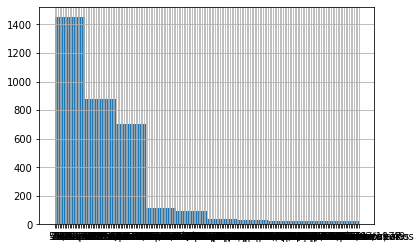

In [76]:
df_pp.idade.hist()

In [87]:
df_pp.iloc[:, -37:]

,pp001,pp002,pp003,pp004,pp005,pp006,pp007,pp008,pp009,pp010,...,pp028,pp029,pp030,pp031,pp032,pp033,pp034,pp035,pp036,pp037
1,5.0,5.0,5.0,5.0,2.0,1.0,2.0,4.0,4.0,5.0,...,4.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0,2.0,5.0
2,5.0,5.0,5.0,5.0,5.0,2.0,1.0,4.0,4.0,3.0,...,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,4.0
3,5.0,5.0,4.0,5.0,5.0,2.0,2.0,4.0,4.0,4.0,...,4.0,3.0,4.0,2.0,2.0,4.0,4.0,5.0,4.0,5.0
4,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,4.0,4.0,...,4.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,2.0,5.0
5,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,2.0,4.0,...,NaN,5.0,3.0,2.0,2.0,2.0,2.0,5.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,5.0
3633,4.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,...,3.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0
3634,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data = df_pp.iloc[:, -37:]

In [123]:
pp_questions

,Item
0,Os educadores já estão muito ocupados com sua...
1,"Como professor, sou capaz de mediar a construç..."
2,"Como educador, entendo que é papel da escola o..."
3,Admito ser necessário abordar temas como a pr...
4,A escola é o principal contexto para realizaçã...
5,Entendo que trabalhar com a prevenção do uso d...
6,"Acredito que, ações para reduzir o consumo de ..."
7,"Considero o confronto e o ""sermão"" como os mét..."
8,Conheço o suficiente sobre as causas dos probl...
9,Oriento meus alunos sobre os padrões de consu...


In [115]:
pp_questions.index.astype('int')

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36],
           dtype='int64')

In [127]:
pd.Series(pp_questions.index).astype('int').add(101).astype('str').str.replace('^1', 'pp0').to_list()

<ipython-input-127-905592fdcaaf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pd.Series(pp_questions.index).astype('int').add(101).astype('str').str.replace('^1', 'pp0').to_list()


['pp001',
 'pp002',
 'pp003',
 'pp004',
 'pp005',
 'pp006',
 'pp007',
 'pp008',
 'pp009',
 'pp010',
 'pp011',
 'pp012',
 'pp013',
 'pp014',
 'pp015',
 'pp016',
 'pp017',
 'pp018',
 'pp019',
 'pp020',
 'pp021',
 'pp022',
 'pp023',
 'pp024',
 'pp025',
 'pp026',
 'pp027',
 'pp028',
 'pp029',
 'pp030',
 'pp031',
 'pp032',
 'pp033',
 'pp034',
 'pp035',
 'pp036',
 'pp037']

In [128]:
pp_questions['indice'] = pd.Series(pp_questions.index).astype('int').add(101).astype('str').str.replace('^1', 'pp0').to_list()

<ipython-input-128-98d195c88f3e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_questions['indice'] = pd.Series(pp_questions.index).astype('int').add(101).astype('str').str.replace('^1', 'pp0').to_list()


In [129]:
pp_questions

,Item,indice
0,Os educadores já estão muito ocupados com sua...,pp001
1,"Como professor, sou capaz de mediar a construç...",pp002
2,"Como educador, entendo que é papel da escola o...",pp003
3,Admito ser necessário abordar temas como a pr...,pp004
4,A escola é o principal contexto para realizaçã...,pp005
5,Entendo que trabalhar com a prevenção do uso d...,pp006
6,"Acredito que, ações para reduzir o consumo de ...",pp007
7,"Considero o confronto e o ""sermão"" como os mét...",pp008
8,Conheço o suficiente sobre as causas dos probl...,pp009
9,Oriento meus alunos sobre os padrões de consu...,pp010


In [105]:
data.columns

Index(['pp001', 'pp002', 'pp003', 'pp004', 'pp005', 'pp006', 'pp007', 'pp008',
       'pp009', 'pp010', 'pp011', 'pp012', 'pp013', 'pp014', 'pp015', 'pp016',
       'pp017', 'pp018', 'pp019', 'pp020', 'pp021', 'pp022', 'pp023', 'pp024',
       'pp025', 'pp026', 'pp027', 'pp028', 'pp029', 'pp030', 'pp031', 'pp032',
       'pp033', 'pp034', 'pp035', 'pp036', 'pp037'],
      dtype='object')

In [132]:
data.columns = pp_questions.Item

In [133]:
data

Item,Os educadores já estão muito ocupados com suas atividades educacionais para realizarem estratégias de prevenção.,"Como professor, sou capaz de mediar a construção colaborativa do conhecimento, e posso contribuir para realizar mudanças sociais.","Como educador, entendo que é papel da escola orientar seus alunos, almejando a construção colaborativa de sua identidade.",Admito ser necessário abordar temas como a promoção de saúde no contexto escolar.,A escola é o principal contexto para realização de ações em saúde e educação para os adolescentes.,Entendo que trabalhar com a prevenção do uso de álcool seja tão importante quanto a prevenção do uso de outras drogas.,"Acredito que, ações para reduzir o consumo de álcool e outras drogas entre adolescentes ou atrasar o início de seu uso são positivas.","Considero o confronto e o ""sermão"" como os métodos mais eficazes de abordagem aos usuários de álcool e outras drogas.",Conheço o suficiente sobre as causas dos problemas relacionados à álcool e outras drogas para lidar com um aluno usuário de drogas.,Oriento meus alunos sobre os padrões de consumo de risco relativos ao uso de álcool e outras drogas.,...,A prevenção do uso de álcool e outras drogas na escola não deve fazer parte do projeto político pedagógico.,Eu crio um ambiente propício à interação entre professor-aluno a fim de favorecer as estratégias de prevenção ao uso de álcool e outras drogas.,Posso aconselhar apropriadamente meus alunos sobre o consumo de álcool e outras drogas e seu efeito.,Oriento de forma adequada os alunos a diminuir ou a parar o consumo de álcool e outras drogas.,Eu me sinto seguro para expor minhas preocupações profissionais sobre o padrão de uso de álcool e outras drogas e os riscos associados à saúde dos meus alunos.,Considero que não tenho como ajudar os alunos usuários de álcool e outras drogas.,"Em geral, os educadores não podem ajudar seus alunos na redução do consumo de álcool e outras drogas.",Não sei como devo abordar os alunos para auxiliá-los na redução do consumo de álcool e outras drogas.,Não sei o que perguntar aos alunos para obter informações sobre o consumo de álcool e outras drogas.,Suponho que práticas para reduzir o uso de álcool e outras drogas entre adolescentes são benéficas.
1,3.0,1.0,5.0,5.0,5.0,5.0,2.0,1.0,2.0,4.0,...,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0
2,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
3,1.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,2.0,4.0,...,1.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,5.0
4,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,...,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0
5,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,...,1.0,4.0,NaN,5.0,3.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,2.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,...,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0
3633,3.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,...,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0
3634,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


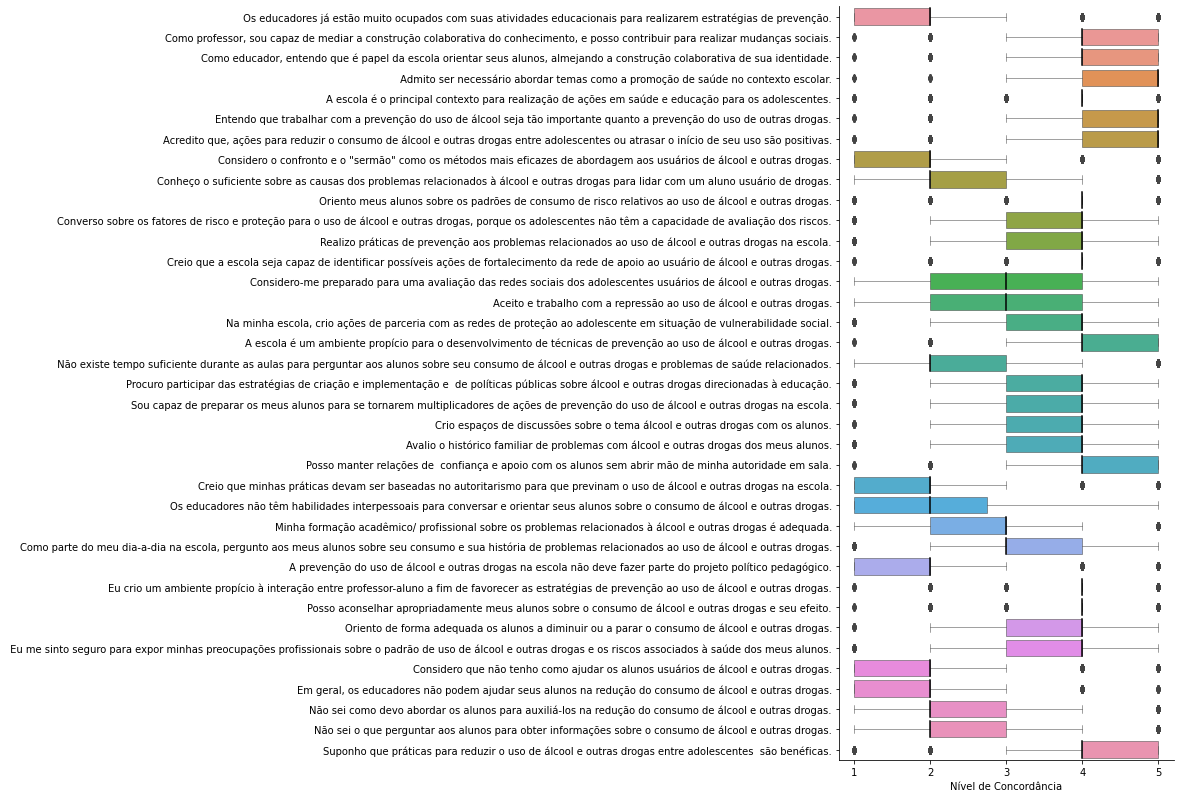

In [144]:


data.columns = [pp_questions.iloc[x, 0] for x in range(len(data.columns))]
g = sns.catplot(
    data=data,
    height=11,
    aspect=1.5,
    kind="box",
    orient="h",
    linewidth=0.5,
    medianprops={"linewidth": 1.5, "color": "black"},
)
g.axes[0, 0].set_xlabel("Nível de Concordância")
g.axes[0, 0].set_xticks(np.arange(1, 6, 1.0))
g.savefig("../figures/pp/perguntas_boxplot.svg")


In [138]:
df_pp.pp037.unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [141]:
data['Suponho que práticas para reduzir o uso de álcool e outras drogas entre adolescentes  são benéficas.'].unique()

array([ 5.,  4., nan,  3.,  2.,  1.])

In [146]:
data.columns

Index([' Os educadores já estão muito ocupados com suas atividades educacionais para realizarem estratégias de prevenção.',
       'Como professor, sou capaz de mediar a construção colaborativa do conhecimento, e posso contribuir para realizar mudanças sociais.',
       'Como educador, entendo que é papel da escola orientar seus alunos, almejando a construção colaborativa de sua identidade.',
       ' Admito ser necessário abordar temas como a promoção de saúde no contexto escolar.',
       'A escola é o principal contexto para realização de ações em saúde e educação para os adolescentes.',
       'Entendo que trabalhar com a prevenção do uso de álcool seja tão importante quanto a prevenção do uso de outras drogas.',
       'Acredito que, ações para reduzir o consumo de álcool e outras drogas entre adolescentes ou atrasar o início de seu uso são positivas.',
       'Considero o confronto e o "sermão" como os métodos mais eficazes de abordagem aos usuários de álcool e outras drogas.',
 

<AxesSubplot:>

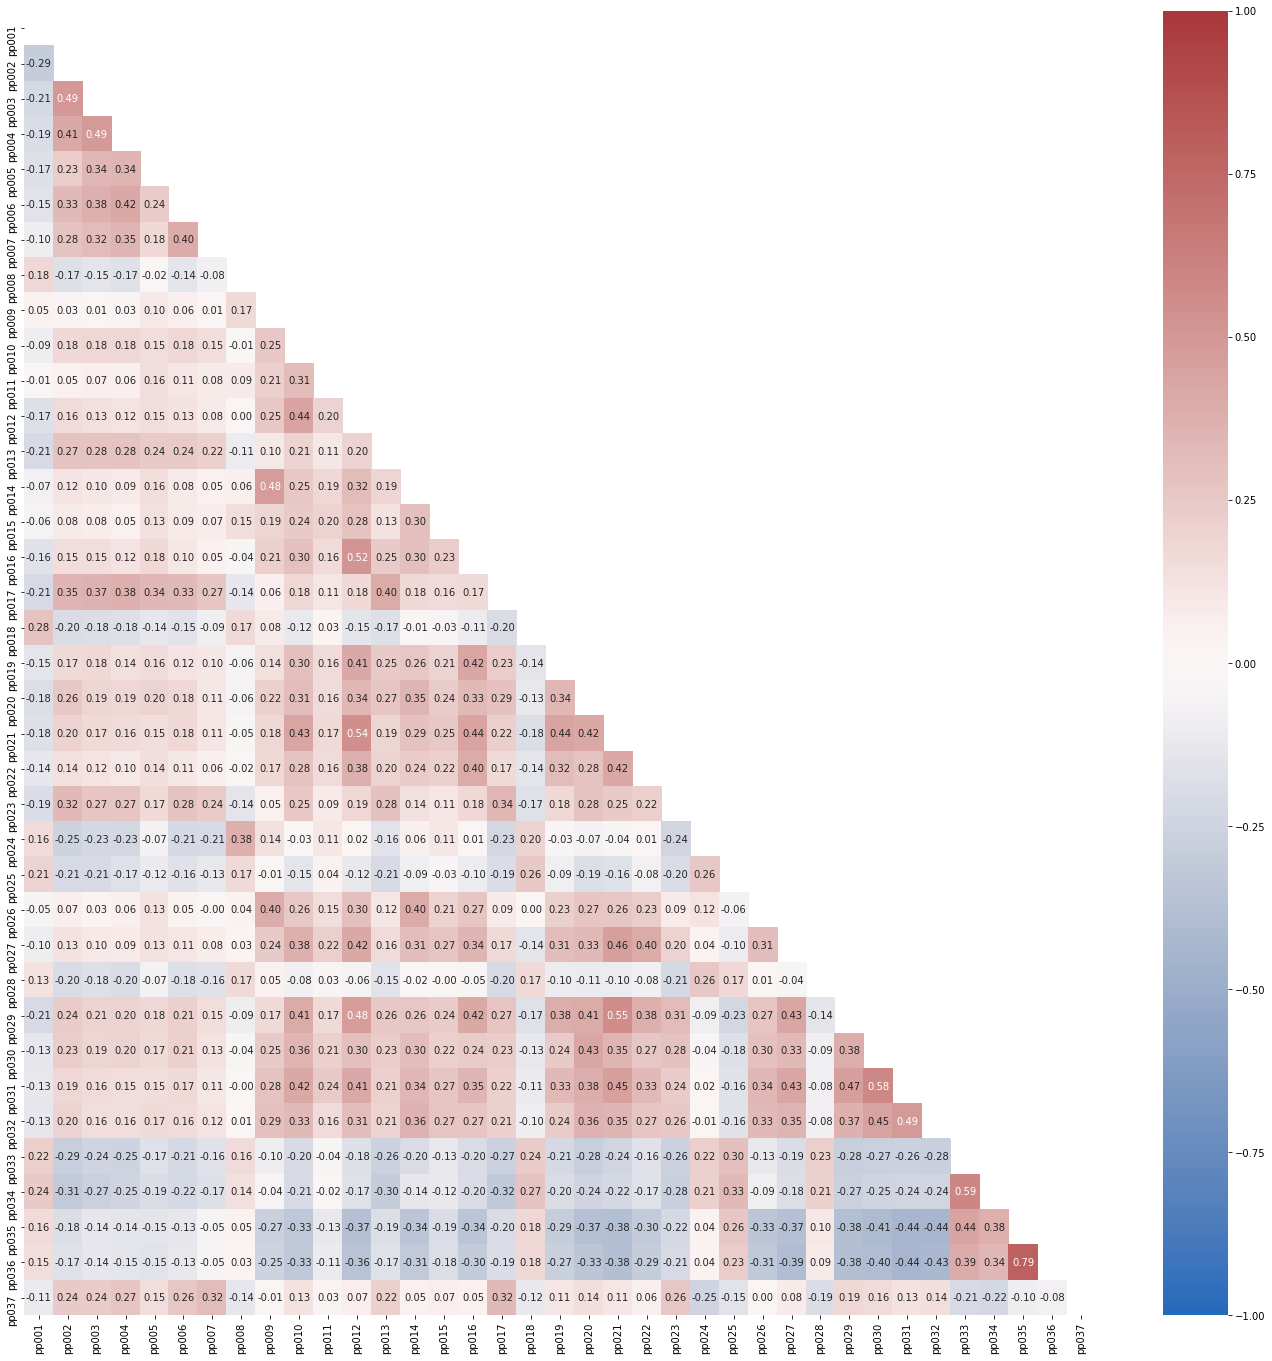

In [156]:
plt.figure(figsize=(24, 24))



# columns_correlation = [
#     '',
    
# ]

data = df_pp.iloc[:,-37:]#[columns_correlation]
#data.columns = [f"Q{x:01}" for x in range(len(data.columns))]

mask = np.triu(np.ones(data.corr().shape, dtype=np.bool_))
sns.heatmap(data.corr(), mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="vlag")

In [157]:
data.columns = pp_questions.Item

In [158]:
data

Item,Os educadores já estão muito ocupados com suas atividades educacionais para realizarem estratégias de prevenção.,"Como professor, sou capaz de mediar a construção colaborativa do conhecimento, e posso contribuir para realizar mudanças sociais.","Como educador, entendo que é papel da escola orientar seus alunos, almejando a construção colaborativa de sua identidade.",Admito ser necessário abordar temas como a promoção de saúde no contexto escolar.,A escola é o principal contexto para realização de ações em saúde e educação para os adolescentes.,Entendo que trabalhar com a prevenção do uso de álcool seja tão importante quanto a prevenção do uso de outras drogas.,"Acredito que, ações para reduzir o consumo de álcool e outras drogas entre adolescentes ou atrasar o início de seu uso são positivas.","Considero o confronto e o ""sermão"" como os métodos mais eficazes de abordagem aos usuários de álcool e outras drogas.",Conheço o suficiente sobre as causas dos problemas relacionados à álcool e outras drogas para lidar com um aluno usuário de drogas.,Oriento meus alunos sobre os padrões de consumo de risco relativos ao uso de álcool e outras drogas.,...,A prevenção do uso de álcool e outras drogas na escola não deve fazer parte do projeto político pedagógico.,Eu crio um ambiente propício à interação entre professor-aluno a fim de favorecer as estratégias de prevenção ao uso de álcool e outras drogas.,Posso aconselhar apropriadamente meus alunos sobre o consumo de álcool e outras drogas e seu efeito.,Oriento de forma adequada os alunos a diminuir ou a parar o consumo de álcool e outras drogas.,Eu me sinto seguro para expor minhas preocupações profissionais sobre o padrão de uso de álcool e outras drogas e os riscos associados à saúde dos meus alunos.,Considero que não tenho como ajudar os alunos usuários de álcool e outras drogas.,"Em geral, os educadores não podem ajudar seus alunos na redução do consumo de álcool e outras drogas.",Não sei como devo abordar os alunos para auxiliá-los na redução do consumo de álcool e outras drogas.,Não sei o que perguntar aos alunos para obter informações sobre o consumo de álcool e outras drogas.,Suponho que práticas para reduzir o uso de álcool e outras drogas entre adolescentes são benéficas.
1,3.0,1.0,5.0,5.0,5.0,5.0,2.0,1.0,2.0,4.0,...,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,5.0
2,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
3,1.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,2.0,4.0,...,1.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,5.0
4,2.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,...,2.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0
5,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,...,1.0,4.0,NaN,5.0,3.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,2.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,...,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0
3633,3.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,...,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0
3634,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
for i in range(data.shape[1]-1):
    data_corr = data.corr().iloc[i:+1,:]
    data_corr.sort_values(axis=1, by=data_corr.index[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [197]:
data.iloc[:,0:1]

Item,Os educadores já estão muito ocupados com suas atividades educacionais para realizarem estratégias de prevenção.
1,3.0
2,1.0
3,1.0
4,2.0
5,1.0
...,...
3632,2.0
3633,3.0
3634,2.0
3635,NaN


In [202]:
data.corr().iloc[36:37,:]

Item,Os educadores já estão muito ocupados com suas atividades educacionais para realizarem estratégias de prevenção.,"Como professor, sou capaz de mediar a construção colaborativa do conhecimento, e posso contribuir para realizar mudanças sociais.","Como educador, entendo que é papel da escola orientar seus alunos, almejando a construção colaborativa de sua identidade.",Admito ser necessário abordar temas como a promoção de saúde no contexto escolar.,A escola é o principal contexto para realização de ações em saúde e educação para os adolescentes.,Entendo que trabalhar com a prevenção do uso de álcool seja tão importante quanto a prevenção do uso de outras drogas.,"Acredito que, ações para reduzir o consumo de álcool e outras drogas entre adolescentes ou atrasar o início de seu uso são positivas.","Considero o confronto e o ""sermão"" como os métodos mais eficazes de abordagem aos usuários de álcool e outras drogas.",Conheço o suficiente sobre as causas dos problemas relacionados à álcool e outras drogas para lidar com um aluno usuário de drogas.,Oriento meus alunos sobre os padrões de consumo de risco relativos ao uso de álcool e outras drogas.,...,A prevenção do uso de álcool e outras drogas na escola não deve fazer parte do projeto político pedagógico.,Eu crio um ambiente propício à interação entre professor-aluno a fim de favorecer as estratégias de prevenção ao uso de álcool e outras drogas.,Posso aconselhar apropriadamente meus alunos sobre o consumo de álcool e outras drogas e seu efeito.,Oriento de forma adequada os alunos a diminuir ou a parar o consumo de álcool e outras drogas.,Eu me sinto seguro para expor minhas preocupações profissionais sobre o padrão de uso de álcool e outras drogas e os riscos associados à saúde dos meus alunos.,Considero que não tenho como ajudar os alunos usuários de álcool e outras drogas.,"Em geral, os educadores não podem ajudar seus alunos na redução do consumo de álcool e outras drogas.",Não sei como devo abordar os alunos para auxiliá-los na redução do consumo de álcool e outras drogas.,Não sei o que perguntar aos alunos para obter informações sobre o consumo de álcool e outras drogas.,Suponho que práticas para reduzir o uso de álcool e outras drogas entre adolescentes são benéficas.
Item,,,,,,,,,,,,,,,,,,,,,
Suponho que práticas para reduzir o uso de álcool e outras drogas entre adolescentes são benéficas.,-0.110224,0.242493,0.241629,0.269377,0.149815,0.263111,0.316831,-0.135744,-0.013552,0.129311,...,-0.18809,0.185966,0.156593,0.126072,0.142126,-0.207302,-0.219013,-0.09933,-0.077084,1.0


In [204]:
data.shape[1]-1

36